In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from math import sqrt
from numpy import split
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras_tuner import RandomSearch
from keras_tuner import Hyperband
from keras_tuner import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

2022-06-13 23:05:41.552509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-13 23:05:41.552531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import random
random.seed(123)

In [3]:
res_time = '60T'
edificio = 'A'

In [23]:
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)

(8423, 23)


,dif_cons,V2,V4,V12,V26,V5_0,V5_1,V5_2,Hora_1,Hora_2,...,Season_3,Season_4,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt,dpv
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,1.34,22.95,1.0,23.41,0.0,0,1,0,0,0,...,0,0,3.3,64.4,0.0,0.3,208.0,0.0,-2.7,0.3
2021-01-01 01:00:00+00:00,1.31,22.91,1.0,23.41,0.0,0,1,0,0,0,...,0,0,2.8,67.3,0.0,0.4,160.1,0.0,-2.7,0.2
2021-01-01 02:00:00+00:00,1.30,22.86,1.0,23.41,0.0,0,1,0,0,0,...,0,0,3.2,67.0,0.0,0.3,196.4,0.0,-2.4,0.3


## MLP EDIFICIO A SIN STANDARIZAR

In [49]:
from sklearn.neural_network import MLPRegressor
np.random.seed(1234)
res_time = '60T'
edificio = 'A'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8423, 23)
MLPRegressor()
Test RMSE: 1.458
Test CVRMSE: 30.062
Test R squared: 0.761


## MLP EDIFICIO A STANDARIZADO 

In [79]:
np.random.seed(1234)
res_time = '60T'
edificio = 'A'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
np.random.seed(1234)
res_time = '60T'
edificio = 'A'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8423, 23)
(8423, 23)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 0.980
Test CVRMSE: 20.221
Test R squared: 0.892


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP EDIFICIO A STANDARIZADO y lag 1

In [88]:
np.random.seed(1234)
res_time = '60T'
edificio = 'A'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data['lagcons'] = data['dif_cons'].shift(1)
data.head(3)
data = data.iloc[1: , :] # delete first row
data.head(3)
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8423, 23)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 0.844
Test CVRMSE: 17.372
Test R squared: 0.919


## MLP EDIFICIO B SIN STANDARIZAR

In [47]:
from sklearn.neural_network import MLPRegressor
np.random.seed(1234)
res_time = '60T'
edificio = 'B'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8425, 23)
MLPRegressor()
Test RMSE: 0.824
Test CVRMSE: 30.859
Test R squared: 0.794


## MLP EDIFICIO B STANDARIZADO

In [65]:
np.random.seed(1234)
res_time = '60T'
edificio = 'B'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8425, 23)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 0.601
Test CVRMSE: 22.506
Test R squared: 0.891


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP EDIFICIO B STANDARIZADO y lag 1

In [89]:
np.random.seed(1234)
res_time = '60T'
edificio = 'B'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data['lagcons'] = data['dif_cons'].shift(1)
data.head(3)
data = data.iloc[1: , :] # delete first row
data.head(3)
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8425, 23)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 0.522
Test CVRMSE: 19.655
Test R squared: 0.915


## MLP EDIFICIO C SIN STANDARIZAR

In [50]:
from sklearn.neural_network import MLPRegressor
res_time = '60T'
edificio = 'C'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8122, 19)
MLPRegressor()
Test RMSE: 3.492
Test CVRMSE: 88.444
Test R squared: 0.443


## MLP EDIFICIO C STANDARIZADO

In [67]:
np.random.seed(1234)
res_time = '60T'
edificio = 'C'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data.head(3)
#data = data[['dif_cons', 'V4', 'Hora_1', 'Hora_2', 'Hora_3']]
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8122, 19)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 3.029
Test CVRMSE: 76.071
Test R squared: 0.598


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP EDIFICIO C STANDARIZADO y lag 1

In [90]:
np.random.seed(1234)
res_time = '60T'
edificio = 'C'
data = pd.read_csv('data-model-consumo' + edificio + '-' + res_time + '.csv', sep=";", index_col=0)
#data = data.drop(columns=['V5_0', 'Hora_3'])
print(data.shape)
data['lagcons'] = data['dif_cons'].shift(1)
data.head(3)
data = data.iloc[1: , :] # delete first row
data.head(3)
df = data
df
X = df.drop(['dif_cons'],axis=1)
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)
test_y  = y_test
prediction = model.predict(X_test)
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))
test_y = scaler_y.inverse_transform(test_y.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

(8122, 19)


/home/aurorax/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor()
Test RMSE: 2.289
Test CVRMSE: 58.025
Test R squared: 0.767


In [25]:
data.describe()

,dif_cons,V4,Hora_1,Hora_2,Hora_3
count,8423.000000,8423.000000,8423.000000,8423.000000,8423.000000
mean,4.890831,6.701175,0.333135,0.333373,0.333492
std,2.990896,3.425789,0.471362,0.471446,0.471488
min,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.580000,4.000000,0.000000,0.000000,0.000000
50%,4.310000,8.000000,0.000000,0.000000,0.000000
75%,6.660000,9.000000,1.000000,1.000000,1.000000
max,24.910000,18.000000,1.000000,1.000000,1.000000


In [26]:
df = data
df

,dif_cons,V4,Hora_1,Hora_2,Hora_3
Fecha,,,,,
2021-01-01 00:00:00+00:00,1.34,1.0,0,0,1
2021-01-01 01:00:00+00:00,1.31,1.0,0,0,1
2021-01-01 02:00:00+00:00,1.30,1.0,0,0,1
2021-01-01 03:00:00+00:00,1.31,1.0,0,0,1
2021-01-01 04:00:00+00:00,1.31,1.0,0,0,1
...,...,...,...,...,...
2021-12-17 20:00:00+00:00,1.38,6.0,0,1,0
2021-12-17 21:00:00+00:00,1.22,6.0,0,1,0
2021-12-17 22:00:00+00:00,1.59,6.0,0,0,1


In [28]:
X = df[['V4', 'Hora_1', 'Hora_2', 'Hora_3']]
y = df['dif_cons']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
from sklearn.neural_network import MLPRegressor
model = model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

MLPRegressor()


In [31]:
test_y  = y_test
prediction = model.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

Test RMSE: 1.927
Test CVRMSE: 39.425
Test R squared: 0.599


In [15]:
def split_dataset(data, per_train):
    train = data[0:int(np.ceil(df.shape[0]*per_train))]
    test = data[int(np.ceil(df.shape[0]*per_train)): int(np.ceil(df.shape[0]*(per_train+per_test)))]
    val = data[int(np.ceil(df.shape[0]*(per_train+per_test))):]
    
    train = array(train)
    test = array(test)
    val = array(val)
    return train, test, val

In [9]:
def split_dataset(data, per_train):
    train = data[0:int(np.ceil(df.shape[0]*per_train))]
    val = data[int(np.ceil(df.shape[0]*per_train)): int(np.ceil(df.shape[0]*(per_train+per_test)))]
    test = data[int(np.ceil(df.shape[0]*(per_train+per_test))):]
    #Escalado en train y test por separado. Si no se hace aquí ya no se puede porque todo lo que sigue es con arrays 3D
    scaler_y = StandardScaler()
    train_y = scaler_y.fit_transform(train[:,0].reshape(-1, 1))
    val_y = scaler_y.fit_transform(val[:,0].reshape(-1, 1))
    test_y = scaler_y.transform(test[:,0].reshape(-1, 1))
    scaler_x = StandardScaler()
    train_x = scaler_x.fit_transform(train[:,1:]) 
    val_x = scaler_x.fit_transform(val[:,1:]) 
    test_x = scaler_x.transform(test[:,1:])
    
    #Rehacemos los DataFrames con los datos escalados para poder hacer el split
    train = pd.concat([pd.DataFrame(train_y),pd.DataFrame(train_x)], axis=1)
    test = pd.concat([pd.DataFrame(test_y),pd.DataFrame(test_x)], axis=1)
    val = pd.concat([pd.DataFrame(val_y),pd.DataFrame(val_x)], axis=1)

    train = array(train)
    test = array(test)
    val = array(val)
    return train, test, val, scaler_x, scaler_y

In [10]:
# split en train y test
per_train = 0.7
per_test = 0.15
train, test, val, scaler_x, scaler_y = split_dataset(df.values, per_train)
print('shape: [muestras, pasos de tiempo, características]')
print('train shape:', train.shape)
print('val shape:', val.shape)
print('test shape:', test.shape)

shape: [muestras, pasos de tiempo, características]
train shape: (5897, 2)
val shape: (1263, 2)
test shape: (1263, 2)


In [11]:
train

array([[-1.12598766, -1.35657131],
       [-1.13569959, -1.35657131],
       [-1.1389369 , -1.35657131],
       ...,
       [ 0.89409373,  0.31119124],
       [ 0.35670028,  0.31119124],
       [ 0.76783864,  0.31119124]])

In [12]:
test

array([[-1.24651855, -0.25586264],
       [-1.34563164, -0.25586264],
       [-0.98972553, -0.25586264],
       ...,
       [-2.48543222, -2.30546845],
       [-2.69717383, -2.30546845],
       [-2.51696821, -2.30546845]])

In [227]:
def to_supervised(train, n_input, n_out):
    # Ponemos los datos en 2D: una entrada para cada muestra y paso de tiempo con las n características
    data = train#.reshape((train.shape[0]*train.shape[1], train.shape[2])) 
    X, y = list(), list()
    in_start = 0
    # Pasamos por todo el conjunto de datos, de step en step
    for _ in range(len(data)):
        # Definimos cuando empieza el input, cuando acaba, e igual para el output
        # En este caso el output empieza cuando acaba el input
        in_end = in_start + n_input
        out_end = in_end + n_out
        # Iteramos mientras haya ejemplos
        if out_end <= len(data):
            X.append(data[in_start:in_end, :]) # X son todas las variables en t
            y.append(data[in_end:out_end, 0])  # y es la temperatura en t+1 (si n_out=1)
        # Pasamos al siguiente instante de tiempo
        in_start += 1
    X = array(X)
    y = array(y)
    return X, y

In [228]:
n_input = 3
n_out = 1

In [229]:
train_x, train_y = to_supervised(train, n_input, n_out)
test_x, test_y = to_supervised(test, n_input, n_out)
val_x, val_y = to_supervised(val, n_input, n_out)
print('train_x shape:' , train_x.shape) 
print('train_y shape:'  , train_y.shape)   
print('val_x shape:' , val_x.shape)  
print('val_y shape:' , val_y.shape) 
print('test_x shape:' , test_x.shape)  
print('test_y shape:' , test_y.shape)    

train_x shape: (5894, 3, 2)
train_y shape: (5894, 1)
val_x shape: (1260, 3, 2)
val_y shape: (1260, 1)
test_x shape: (1260, 3, 2)
test_y shape: (1260, 1)


In [108]:
train_y

array([[1.31],
       [1.31],
       [1.3 ],
       ...,
       [7.58],
       [5.92],
       [7.19]])

In [233]:
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
print('n_timesteps:' , n_timesteps) 
print('n_features:'  , n_features)     
print('n_outputs:' , n_outputs)   

n_timesteps: 3
n_features: 2
n_outputs: 1


In [234]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps, n_features)))
model.add(RepeatVector(n_outputs))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(50)))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mae', optimizer='adam')
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_data=(val_x, val_y),
                    verbose=2, shuffle=False, callbacks=stop_early)

Epoch 1/50
93/93 - 4s - loss: 0.4506 - val_loss: 0.4612 - 4s/epoch - 47ms/step
Epoch 2/50
93/93 - 1s - loss: 0.2863 - val_loss: 0.4527 - 678ms/epoch - 7ms/step
Epoch 3/50
93/93 - 1s - loss: 0.2704 - val_loss: 0.4176 - 650ms/epoch - 7ms/step
Epoch 4/50
93/93 - 1s - loss: 0.2603 - val_loss: 0.4131 - 693ms/epoch - 7ms/step
Epoch 5/50
93/93 - 1s - loss: 0.2546 - val_loss: 0.4126 - 672ms/epoch - 7ms/step
Epoch 6/50
93/93 - 1s - loss: 0.2530 - val_loss: 0.4082 - 668ms/epoch - 7ms/step
Epoch 7/50
93/93 - 1s - loss: 0.2508 - val_loss: 0.4038 - 722ms/epoch - 8ms/step
Epoch 8/50
93/93 - 1s - loss: 0.2491 - val_loss: 0.4023 - 724ms/epoch - 8ms/step
Epoch 9/50
93/93 - 1s - loss: 0.2473 - val_loss: 0.4022 - 804ms/epoch - 9ms/step
Epoch 10/50
93/93 - 1s - loss: 0.2447 - val_loss: 0.3998 - 683ms/epoch - 7ms/step
Epoch 11/50
93/93 - 1s - loss: 0.2414 - val_loss: 0.4034 - 702ms/epoch - 8ms/step
Epoch 12/50
93/93 - 1s - loss: 0.2432 - val_loss: 0.4055 - 677ms/epoch - 7ms/step
Epoch 13/50
93/93 - 1s - lo

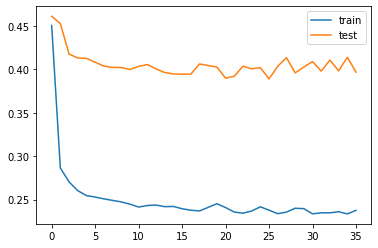

In [235]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [175]:
def predict(datos_test_x, datos_test_y, n_input, modelo, steps, features):
    test_y = datos_test_y
    test_x = datos_test_x
    n_timesteps=steps
    n_features=features
    #Creamos una lista vacía para las predicciones
    predictions = list()
    #Ponemos los índices i y j a 0
    i=0
    j=0
    #Indice para hacer predicciones en un horizonte de tiempo concreto
    #Saltamos n filas cada m. Ej: tenemos n_obs_despues=12 pero queremos predecir solo la hora siguiente así
    #que predecimos 6 filas, saltamos otras 6 (que serían la 2a hora) y repetimos
    #n = n_obs_despues - n_predict 
    #m = n_predict   #Salto de n cada m
    #test_index = [j for i in range(0,len(test_x), n+m) for j in range(i, m+i) if j<len(test_x)]
    for i in range(len(test_x)):
        data = test_x[i,:,:]
        # Cogemos como input los valores del instante de tiempo anterior al que vamos a predecir
        # Recordar que el x lleva un lag de 1 respecto a la y, por eso es el elemento i y no el i-1
        # Le damos la forma que el modelo necesita para predecir
        input_x = data.reshape((1, n_timesteps, n_features))
        
        # Prediccion para cada paso de tiempo
        yhat = model.predict(input_x, verbose=0)
        yhat_sequence = yhat[0] 

        # Guardamos las predicciones
        predictions.append(yhat_sequence)
        
        # Reescribimos el valor de la temperatura del siguiente paso con la prediccion
        # Añadimos una condición más para que en el último paso de cada evento no actualice, ya
        # que reescribiría datos de otro caso
        if i < len(test_x): #and (j not in range(n_predict-1,len(test_x), n_obs_despues)):
            try: test_x[i+1,n_input,0] = yhat[0]
            except IndexError: continue
            #La excepción es porque al llegar al final no hay un i+1 que actualizar y salta un IndexError
        else: break
        #j+=1
        
    predictions = array(predictions)
    #Seleccionamos solo los ejemplos del conjunto de test que vamos a predecir
    #test_y = test_y[test_index,:]
    return predictions, test_y

In [236]:
#n_predict = 6 #Timesteps a predecir
prediction, test_y = predict(test_x, test_y, n_input, model, n_timesteps, n_features)

In [237]:
prediction = prediction.reshape(prediction.shape[0],prediction.shape[1])

In [238]:
prediction = scaler_y.inverse_transform(prediction)
test_y = scaler_y.inverse_transform(test_y)

In [239]:
rmse = np.sqrt(mean_squared_error(test_y,prediction))
cvrmse = rmse/np.mean(test_y)*100
r2 = r2_score(test_y, prediction)
print('Test RMSE: %.3f' % rmse)
print('Test CVRMSE: %.3f' % cvrmse)
print('Test R squared: %.3f' % r2)

Test RMSE: 1.792
Test CVRMSE: 59.519
Test R squared: -0.874


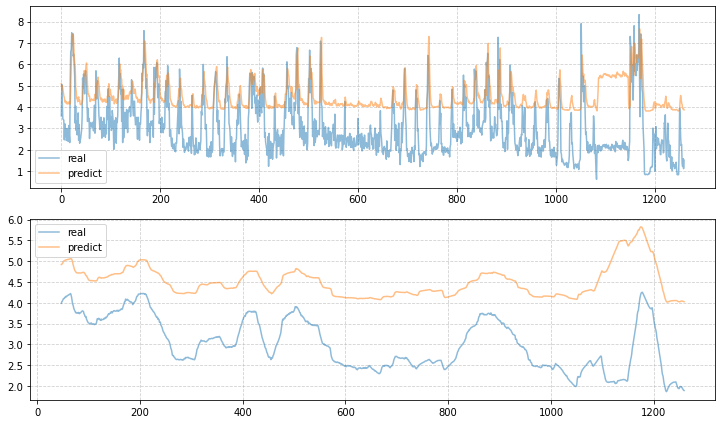

In [240]:
#EDIFICIO A
fig, axs = plt.subplots(figsize=(10,6), nrows = 2, ncols =1, sharex =False)
#fig = plt.figure(figsize =(15, 5))
axs[0].plot(test_y, label='real',alpha=0.5)
axs[0].plot(prediction, label='predict', alpha=0.5)
axs[0].grid(linestyle = "--", alpha=0.6)
axs[0].legend()
#Media móvil por horas
axs[1].plot(pd.DataFrame(test_y).rolling(48).mean(), label='real',alpha=0.5)
axs[1].plot(pd.DataFrame(prediction).rolling(48).mean(), label='predict', alpha=0.5)
axs[1].grid(linestyle = "--", alpha=0.6)
axs[1].legend()
fig.tight_layout()
plt.show()

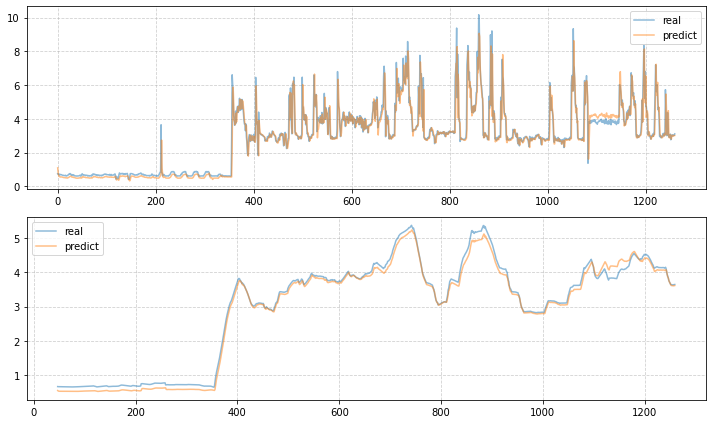

In [220]:
#EDIFICIO B
fig, axs = plt.subplots(figsize=(10,6), nrows = 2, ncols =1, sharex =False)
#fig = plt.figure(figsize =(15, 5))
axs[0].plot(test_y, label='real',alpha=0.5)
axs[0].plot(prediction, label='predict', alpha=0.5)
axs[0].grid(linestyle = "--", alpha=0.6)
axs[0].legend()
#Media móvil por horas
axs[1].plot(pd.DataFrame(test_y).rolling(48).mean(), label='real',alpha=0.5)
axs[1].plot(pd.DataFrame(prediction).rolling(48).mean(), label='predict', alpha=0.5)
axs[1].grid(linestyle = "--", alpha=0.6)
axs[1].legend()
fig.tight_layout()
plt.show()

Test RMSE: 0.683
Test CVRMSE: 22.899
Test R squared: 0.858